In [8]:
import rasterio
import matplotlib.pyplot as plt

# Path to your downloaded GeoTIFF image
image_path = '../data/enmap/neon_sjer/ENMAP01-____L2A-DT0000071722_20240503T192312Z_005_V010402_20240509T042659Z-SPECTRAL_IMAGE_COG.tiff'

# Open the image using Rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read()

    # Get the affine transform for georeferencing
    transform = src.transform

    # Get the CRS (Coordinate Reference System)
    crs = src.crs

    # Get the metadata
    metadata = src.meta

# Check the shape of the image (bands, rows, cols)
print(f"Image shape: {image_data.shape}")

Image shape: (224, 1212, 1236)


In [10]:
print(metadata)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 1236, 'height': 1212, 'count': 224, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(30.0, 0.0, 277185.0,
       0.0, -30.0, 4113525.0)}


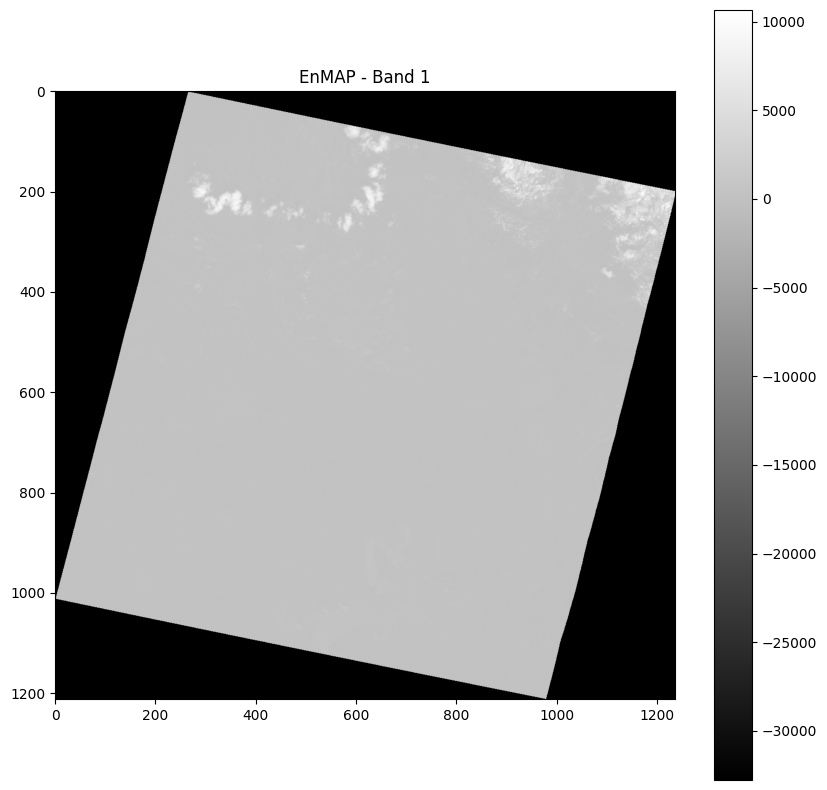

In [3]:
# Plot the first band (Band 1)
plt.figure(figsize=(10, 10))
plt.imshow(image_data[0], cmap='gray')
plt.colorbar()
plt.title('EnMAP - Band 1')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-32768..10710].


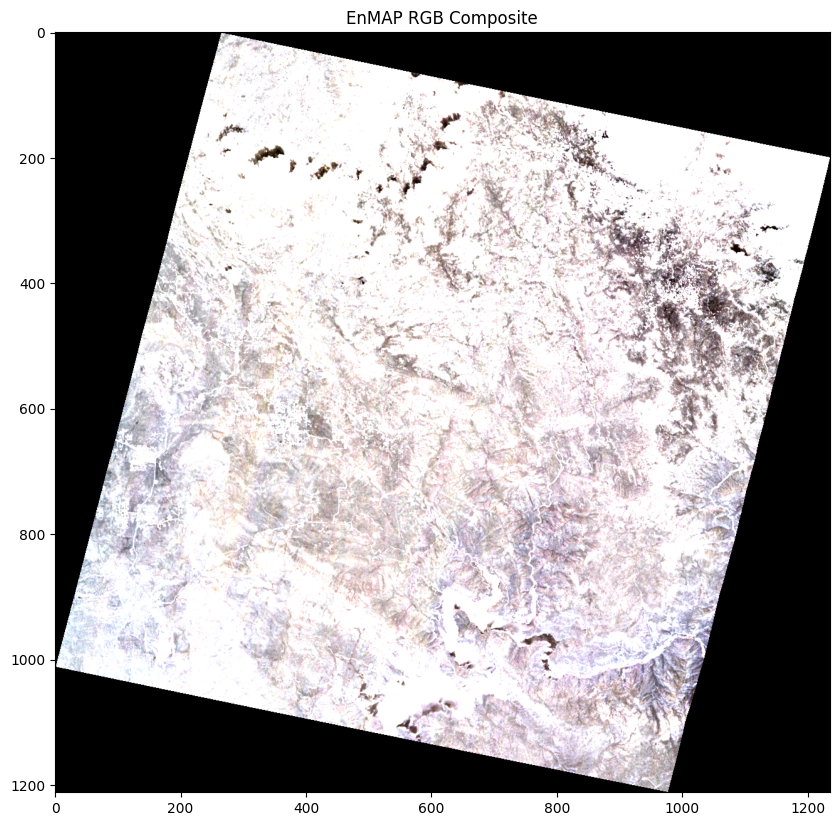

In [4]:
# Assuming the first 3 bands are Red, Green, and Blue
rgb = image_data[[0, 1, 2], :, :]

# Plot the RGB composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb.transpose(1, 2, 0))  # Rearrange dimensions to (rows, cols, bands)
plt.title('EnMAP RGB Composite')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-32768..10754].


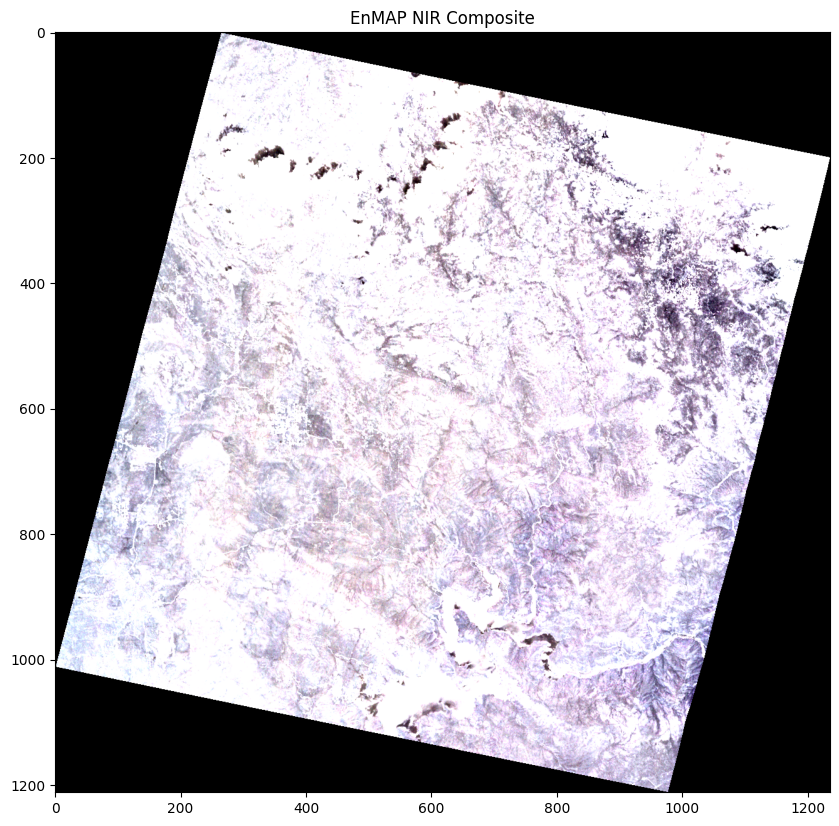

In [5]:
# Example: Red, Green, and NIR bands (Band 4)
rgb_nir = image_data[[0, 1, 3], :, :]  # Assume Band 0: Red, Band 1: Green, Band 3: NIR

# Plot the NIR composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb_nir.transpose(1, 2, 0))  # Rearrange dimensions to (rows, cols, bands)
plt.title('EnMAP NIR Composite')
plt.show()


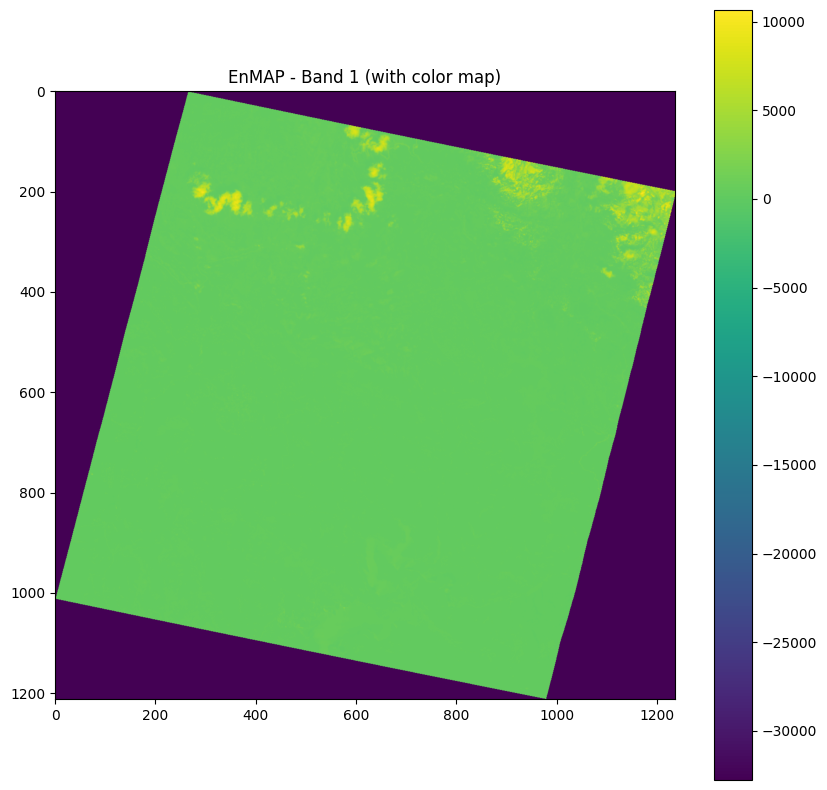

In [6]:

# Visualize Band 1 with a color map
plt.figure(figsize=(10, 10))
plt.imshow(image_data[0], cmap='viridis')  # Use 'viridis' color map
plt.colorbar()
plt.title('EnMAP - Band 1 (with color map)')
plt.show()


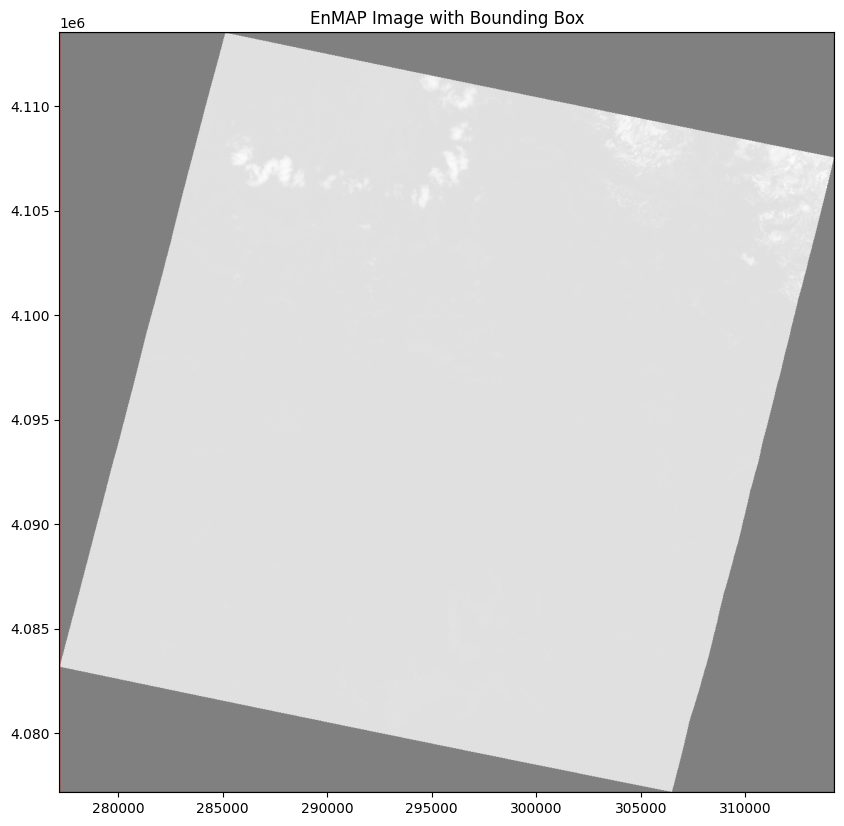

In [7]:
import geopandas as gpd
from shapely.geometry import box

# Create a bounding box from the image's geotransform
bbox = box(
    transform[2],  # xmin
    transform[5],  # ymin
    transform[2] + transform[0] * image_data.shape[2],  # xmax
    transform[5] + transform[4] * image_data.shape[1]  # ymax
)

# Create a GeoDataFrame from the bounding box
gdf = gpd.GeoDataFrame({'geometry': [bbox]}, crs=crs)

# Plot the image with its bounding box
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, facecolor='none', edgecolor='red')
ax.imshow(image_data[0], cmap='gray', extent=[transform[2], transform[2] + transform[0] * image_data.shape[2],
                                              transform[5] + transform[4] * image_data.shape[1], transform[5]], alpha=0.5)
plt.title('EnMAP Image with Bounding Box')
plt.show()


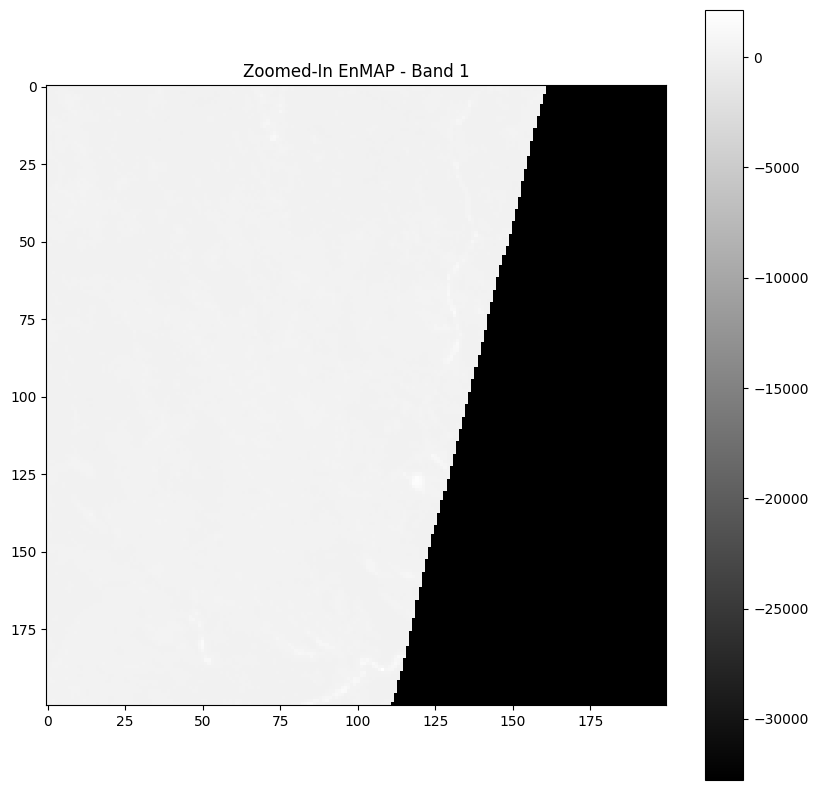

In [11]:
import rasterio
import matplotlib.pyplot as plt

# Path to your downloaded GeoTIFF image

# Define the region of interest (ROI)
start_row, end_row = 500, 700  # Example row range
start_col, end_col = 1000, 1200  # Example column range

# Open the image using Rasterio
with rasterio.open(image_path) as src:
    # Read the image data and extract the region of interest (ROI)
    zoomed_image = src.read()[:, start_row:end_row, start_col:end_col]
    
    # Get the affine transform for the subset image
    transform = src.transform * src.transform.scale(
        (end_col - start_col) / src.width, (end_row - start_row) / src.height
    )

# Plot the zoomed-in image (example: first band)
plt.figure(figsize=(10, 10))
plt.imshow(zoomed_image[0], cmap='gray')  # Plotting the first band
plt.colorbar()
plt.title('Zoomed-In EnMAP - Band 1')
plt.show()
